In [3]:
import os
import re
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import regex
from chemformula import ChemFormula as cf
%matplotlib inline

In [4]:
def plot_NIST(collected_data, vf): 
    
    #start the plotting stuff
    fig, ax = plt.subplots()
    plt.xlabel(r'Normalized sensitivity coefficient, $s_{i}$', fontsize=15)
    plt.title(f'NIST | {vf}% 2-BTP')
    
    for (eq, sens) in collected_data: 
        ax.barh(eq, sens, color='tab:blue', align='center')
        
    

In [5]:
#PLOTTING SECTION
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.family'] = 'serif'

In [9]:
duplicates = []
#let's track how sensitivities change across 2-BTP volume fractions 

NIST_csvs = [file for file in os.listdir('.') if 'cti' in file]
equations_ = []

for file in [NIST_csvs[0]]: 

    df = pd.read_csv(f'./{file}')
    #now we will collect data to plot 
    
    for index, row in df.iterrows(): 
        sens, eq = row['sensitivity'], row['cantera equation']
        if eq not in equations_: 
            equations_.append(eq)
        else:
            duplicates.append(eq)
        
        

In [10]:
duplicates

['CO + OH <=> CO2 + H',
 'HO2 + OH <=> H2O + O2',
 'HO2 + OH <=> H2O + O2',
 'CF2:CH + O2 <=> CF2:O + HCO',
 '2 HO2 <=> H2O2 + O2',
 'CF2:O + H <=> CF:O + HF',
 'H2O2 + OH <=> H2O + HO2',
 'HO2 + OH <=> H2O + O2',
 'CH2:CF + O2 <=> CF:O + CH2O',
 'CF2:O + H <=> CF:O + HF',
 'CHF:CH[Z] + O2 <=> CHF:O + HCO',
 'HO2 + OH <=> H2O + O2',
 'C4H81 + O <=> C4H7 + OH',
 'C5H6 + O <=> C5H5O(1,3) + H',
 'C5H5 + OH <=> C5H5OH',
 'C5H5 + OH <=> C5H5OH',
 'CF2:CF + O2 <=> CF2:O + CF:O',
 'CH3CHOH + O2 <=> CH3CHO + HO2',
 'CHF:CF[Z] + O2 <=> CF:O + CHF:O']

In [11]:
def format_with_cf(rxn): 
    """ change the equation so it is formatted""" 
    changing_names = {}
    for spec in rxn.split(): 
        if regex.search('[A-Z][0-9]', spec):
            changing_names[spec]=cf(spec).unicode
    #now cycle through to change the equation 
    for old_name, new_name in changing_names.items():
        rxn=rxn.replace(old_name, new_name)
    return rxn

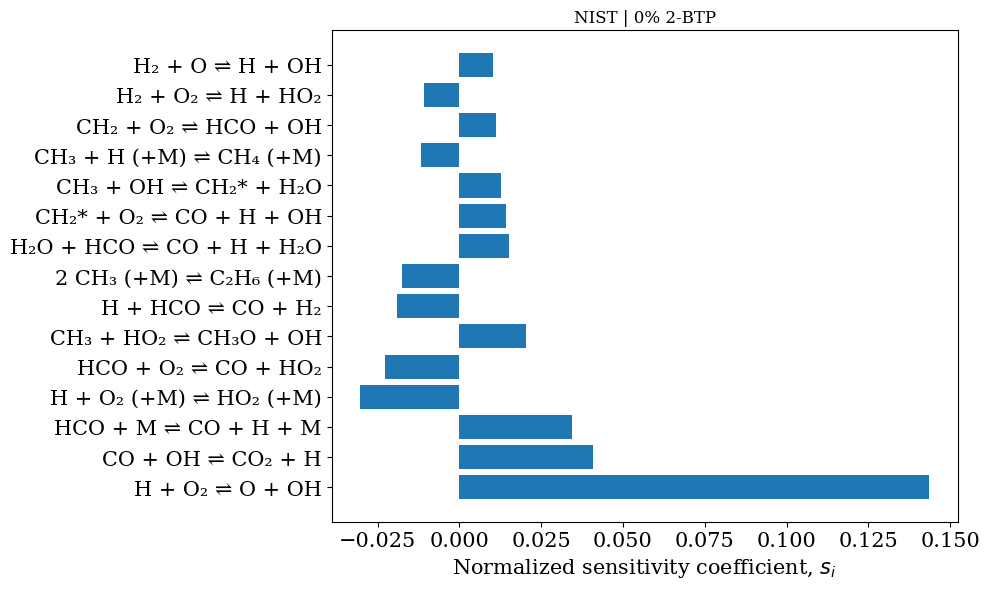

In [12]:
#let's iterate through David's reactions
n = 15 #this is the top n reactions we will look at in our sensitivity analysis 

file ='2-BTP_kinetics_with_M.cti_0.0_regular_sens_NIST.csv'
df = pd.read_csv(file)
vf = re.search('cti_(\S+)_regular', file).group(1)
#now we will collect data to plot 
collected_data = []

for index, row in df.head(n).iterrows(): 
    sens, eq = row['sensitivity'], row['cantera equation']
    #change the reactions to be formatted 
    eq = format_with_cf(eq)
    collected_data.append((eq.replace('<=>', '⇌'), sens))
#print(collected_data)
if float(vf)==0.0:
    plot_NIST(collected_data, 0)
    
        